# 1. Pobieranie Zdjęć i zamienienie zdjęć w numerki

In [14]:
# Importujemy biblioteki, żeby pobrać zdjęcia z internetu i przekształcić je do postaci liczb
from torchvision.datasets import MNIST  # Zestaw zdjęć cyfr 0-9 do nauki i testowania modelu
from torchvision.transforms import ToTensor  # Narzędzie do zamiany zdjęć na liczby, które rozumie komputer

# Pobieramy zdjęcia do nauki (train=True) i do testów (train=False)
# ToTensor() przekształca każde zdjęcie w zestaw liczb (czyli "tensor"), co umożliwia modelowi ich analizę
zdjecia_do_trenowania = MNIST(root='./', train=True, transform=ToTensor(), download=True)
zdjecia_do_testowania = MNIST(root='./', train=False, transform=ToTensor(), download=True)

# Sprawdzamy, ile jest zdjęć do nauki i do testów
len(zdjecia_do_trenowania), len(zdjecia_do_testowania)

(60000, 10000)

In [15]:
prawdziwe_klasy = zdjecia_do_trenowania.classes # Przypisujemy do zmiennej `prawdziwe_klasy` listę wszystkich możliwych klas (czyli cyfr od 0 do 9)
print(prawdziwe_klasy) # Wypisujemy te klasy

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


# 2. Wizualizowanie zdjęć.

In [16]:
zdjecie, prawdziwa_klasa = zdjecia_do_trenowania[1]  # Wybieramy jedno zdjęcie i jego przypisaną prawidłową cyfrę (do zdjęcia liczby 5 będzie przypisana prawdziwa_klasa=5)

In [17]:
zdjecie

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [18]:
zdjecie.shape  # [ilość kanałów kolorów: 1 -> 1 oznacza, że obrazek jest czarno-biały, długość zdjęcia: 28, wysokość zdjęcia: 28]

torch.Size([1, 28, 28])

In [19]:
zdjecie.permute(1, 2, 0).shape  # Zmieniamy układ zdjęcia, żeby można było je wyświetlić w matplotlib
# Nasz format: [kanały kolorów, długość, wysokość]
# Format potrzebny do wizualizacji zdjęć w matplotlib: [wysokość, długość, kanały kolorów]

torch.Size([28, 28, 1])

Text(0.5, 1.0, '0 - zero')

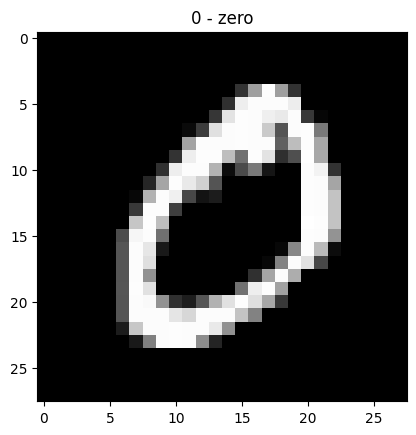

In [20]:
import matplotlib.pyplot as plt

plt.imshow(zdjecie.permute(1, 2, 0), cmap='gray') # Wyświetlamy zdjęcie w kolorze szarym
plt.title(f'{prawdziwe_klasy[prawdziwa_klasa]}') # Dodajemy tytuł z prawdziwą klasą

In [21]:
from torch.utils.data import DataLoader

wielkosc_batcha = 32  # Ustalamy rozmiar paczki, czyli ile zdjęć będzie przetwarzanych jednocześnie.

# Tworzymy loader do danych treningowych. 'shuffle=True' oznacza, że zdjęcia będą losowo mieszane.
zdjecia_do_trenowania_z_batchami = DataLoader(zdjecia_do_trenowania, batch_size=wielkosc_batcha, shuffle=True)

# Tworzymy loader do danych testowych. 'shuffle=False' oznacza, że zdjęcia nie będą mieszane.
zdjecia_do_testowania_z_batchami = DataLoader(zdjecia_do_testowania, batch_size=wielkosc_batcha, shuffle=False)

In [22]:
from torch import nn

# Tworzymy model sieci neuronowej.
model_0 = nn.Sequential(
    nn.Flatten(),  # Zamieniamy obrazek 28x28 w długi wektor (784 piksele).
    nn.Linear(in_features=1 * 28 * 28, out_features=10),  # Przekształcamy 784 piksele na 10 wyników (jedna dla każdej cyfry 0-9).
    nn.ReLU(),  # Dodajemy funkcję aktywacji, która pomaga modelowi lepiej uczyć się.
)

In [23]:
import torch

# Funkcja strat, która mierzy, jak dobrze model przewiduje klasy.
loss_fn = nn.CrossEntropyLoss()

# Optymalizator, który aktualizuje wagi modelu w trakcie uczenia.
optimizer = torch.optim.SGD(
    params=model_0.parameters(),  # Wagi modelu, które chcemy aktualizować.
    lr=0.01  # Tempo uczenia się, które określa, jak szybko model będzie się uczył.
)

In [24]:
from tqdm.auto import tqdm

# Liczba epok, czyli ile razy model będzie się uczył na danych.
epochs = 5

# Pętla, która wykonuje się przez określoną liczbę epok.
for epoch in tqdm(range(epochs)):
    model_0.train()  # Ustawiamy model w tryb treningowy.

    # Pętla przez wszystkie partie zdjęć w zbiorze treningowym.
    for zdjęcia_do_trenowania, prawdziwa_wartosc in zdjecia_do_trenowania_z_batchami:
        y_preds = model_0(zdjęcia_do_trenowania)  # Model przewiduje klasy dla zdjęć.

        train_loss = loss_fn(y_preds, prawdziwa_wartosc)  # Obliczamy stratę dla zbioru treningowego.

        optimizer.zero_grad()  # Zerujemy gradienty przed nową aktualizacją.
        train_loss.backward()  # Obliczamy gradienty wstecznie.
        optimizer.step()  # Aktualizujemy wagi modelu.

    model_0.eval()  # Ustawiamy model w tryb ewaluacji (testowania).
    with torch.inference_mode():  # Wyłączamy obliczenia gradientów, aby zaoszczędzić pamięć.
        for zdjecia_do_testowania, prawdziwa_wartosc in zdjecia_do_testowania_z_batchami:
            test_preds = model_0(zdjecia_do_testowania)  # Model przewiduje klasy dla zdjęć testowych.

            test_loss = loss_fn(test_preds, prawdziwa_wartosc)  # Obliczamy stratę dla zbioru testowego.

    # Wyświetlamy wyniki po każdej epoce.
    print(f'Epoch: {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.7347 | Test Loss: 0.3687
Epoch: 1 | Train Loss: 0.5217 | Test Loss: 0.2817
Epoch: 2 | Train Loss: 0.1675 | Test Loss: 0.2521
Epoch: 3 | Train Loss: 0.5121 | Test Loss: 0.2176
Epoch: 4 | Train Loss: 0.4176 | Test Loss: 0.2090


# Zadanie: Wytrenuj model na 10 epokach